In [1]:
from Bio import SeqIO

msa = [
    str(rec.seq) for rec in SeqIO.parse("../data/cache/lysozyme_alignment.fasta", "fasta")
]
print("MSA sequences:", len(msa))
print("Length of first seq:", len(msa[0]))

MSA sequences: 6
Length of first seq: 130


In [1]:
from Bio import SeqIO
from utils.pssm import _column_counts

msa = [
    str(rec.seq) for rec in SeqIO.parse("data/cache/lysozyme_alignment.fasta", "fasta")
]

print(_column_counts(msa, 33))  # column 34 (0-based)
print(_column_counts(msa, 36))  # column 37
print(_column_counts(msa, 44))  # column 45

Counter({'W': 4, 'F': 2})
Counter({'G': 4, 'N': 2})
Counter({'Y': 4, 'R': 2})


In [2]:
import math
from utils.pssm import _column_counts

entropies = []
majorities = []

for i in range(len(msa[0])):  # 130 positions
    counts = _column_counts(msa, i)
    total = sum(counts.values())
    if total == 0:
        continue
    freqs = [c / total for c in counts.values()]
    ent = -sum(p * math.log2(p) for p in freqs if p > 0)
    maj = max(freqs)
    entropies.append(ent)
    majorities.append(maj)

print("Entropy range:", min(entropies), "to", max(entropies))
print("Majority range:", min(majorities), "to", max(majorities))

Entropy range: -0.0 to 1.584962500721156
Majority range: 0.3333333333333333 to 1.0


[DEBUG] Seq 0: sim_count=6, weight=0.167
[DEBUG] Seq 1: sim_count=6, weight=0.167
[DEBUG] Seq 2: sim_count=6, weight=0.167
[DEBUG] Seq 3: sim_count=6, weight=0.167
[DEBUG] Seq 4: sim_count=6, weight=0.167
[DEBUG] Seq 5: sim_count=6, weight=0.167
[DEBUG] Effective depth (Meff)=1.000
[INFO] MSA size (N)=6, Effective depth (Meff)=1.00
[INFO] Diversity ratio Meff/N=0.17
[DEBUG] Seq 0: sim_count=6, weight=0.167
[DEBUG] Seq 1: sim_count=6, weight=0.167
[DEBUG] Seq 2: sim_count=6, weight=0.167
[DEBUG] Seq 3: sim_count=6, weight=0.167
[DEBUG] Seq 4: sim_count=6, weight=0.167
[DEBUG] Seq 5: sim_count=6, weight=0.167
[DEBUG] Effective depth (Meff)=1.000
[INFO] MSA size (N)=6, Effective depth (Meff)=1.00
[INFO] Diversity ratio Meff/N=0.17
[DEBUG] Seq 0: sim_count=6, weight=0.167
[DEBUG] Seq 1: sim_count=6, weight=0.167
[DEBUG] Seq 2: sim_count=6, weight=0.167
[DEBUG] Seq 3: sim_count=6, weight=0.167
[DEBUG] Seq 4: sim_count=6, weight=0.167
[DEBUG] Seq 5: sim_count=6, weight=0.167
[DEBUG] Effectiv

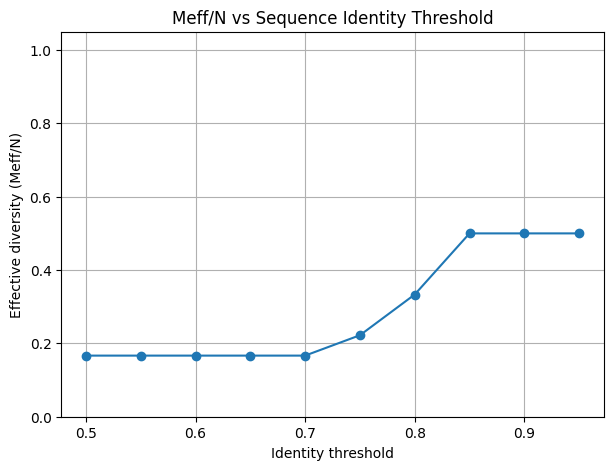

In [1]:
from utils.pssm_debug import plot_meff_vs_threshold


msa_file = "data/cache/lysozyme_alignment.fasta"
plot_meff_vs_threshold(msa_file)